In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [18]:
# banyaknya data pernegara
df['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [4]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [5]:
texts = df['Text'].tolist()
labels = df['language'].tolist()

In [6]:
# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [7]:
sequences = tokenizer.texts_to_sequences(texts)

In [8]:
padded_sequences = pad_sequences(sequences)

In [9]:
label_dict = {label: i for i, label in enumerate(set(labels))}
numeric_labels = np.array([label_dict[label] for label in labels])



In [10]:
# data dibagi menjadi (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, numeric_labels, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=X_train.shape[1])) #Embedding
model.add(LSTM(100)) #LSTM
model.add(Dense(len(set(labels)), activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
550/550 [==============================] - 71s 124ms/step - loss: 1.4008 - accuracy: 0.5587 - val_loss: 0.5275 - val_accuracy: 0.8632
Epoch 2/10
550/550 [==============================] - 38s 68ms/step - loss: 0.3146 - accuracy: 0.9097 - val_loss: 0.2488 - val_accuracy: 0.9220
Epoch 3/10
550/550 [==============================] - 21s 38ms/step - loss: 0.1176 - accuracy: 0.9766 - val_loss: 0.2125 - val_accuracy: 0.9298
Epoch 4/10
550/550 [==============================] - 20s 37ms/step - loss: 0.0396 - accuracy: 0.9936 - val_loss: 0.2085 - val_accuracy: 0.9316
Epoch 5/10
550/550 [==============================] - 15s 26ms/step - loss: 0.0117 - accuracy: 0.9984 - val_loss: 0.2050 - val_accuracy: 0.9320
Epoch 6/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.2313 - val_accuracy: 0.9280
Epoch 7/10
550/550 [==============================] - 14s 25ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.2341 - val_accuracy

In [15]:
# cek akurasi dari model
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print(f'\nAkurasi pada dataset validasi: {val_accuracy * 100:.2f}%')


138/138 [==============================] - 1s 6ms/step - loss: 0.2658 - accuracy: 0.9286

Akurasi pada dataset validasi: 92.86%


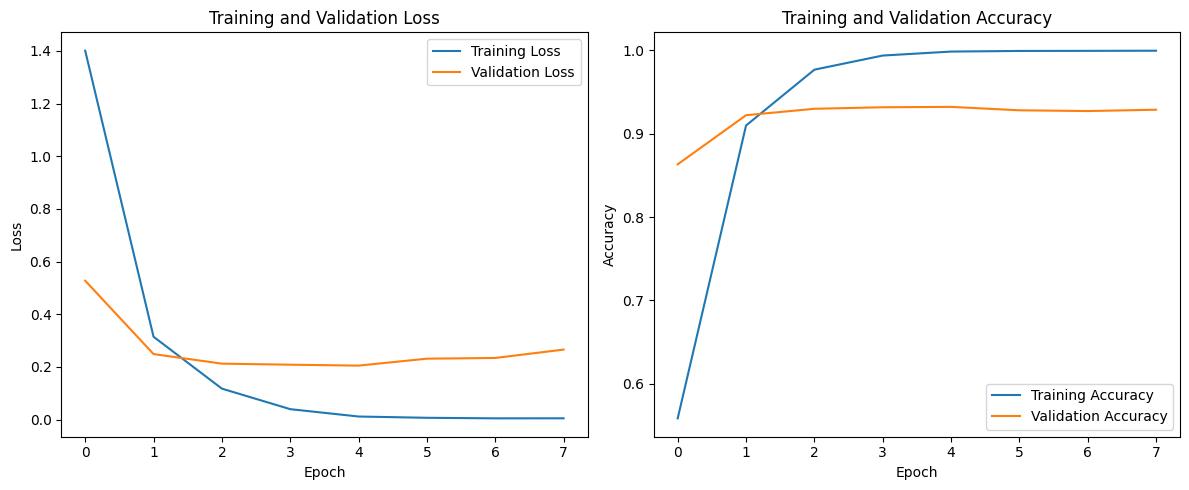

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
def predict_language(input_text):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input = pad_sequences(input_sequence, maxlen=X_train.shape[1])

    prediction = model.predict(padded_input)

    predicted_class = np.argmax(prediction)

    for label, index in label_dict.items():
        if index == predicted_class:
            return label

user_input = input("Masukkan teks untuk diprediksi bahasanya: ")
predicted_language = predict_language(user_input)

print(f"Prediksi Bahasa: {predicted_language}")

Masukkan teks untuk diprediksi bahasanya: Pertandingan sepak bola tadi malam sangat seru, kedua tim bermain dengan semangat tinggi
1/1 [==============================] - 0s 384ms/step
Prediksi Bahasa: Indonesian
